In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Malla unidimensional

In [3]:
L=0.04                      # Longitud de la pared [m]              
n=100                       # Número de nodos
dx=L/(n-1)                  # Delta X [m]
x=np.linspace(0,L,n)        # Malla unidimensional para la pared

Condiciones ambientales y propiedades termofísicas

In [4]:
T_amb=30                    # Temperatura ambiente [°C]
h=45                        # Coeficiente de convección [W/m^2K]
q=5000000                   # Generación de calor [W/m^3]
k=28                        # Conductividad térmica [W/mK]

Condiciones de frontera

In [5]:
T=np.array(np.zeros(n))     # Crear el array de temperatura
TL=0                        # Condición de frontera izquierda
T[0]=TL                     # Fijar la condición de frontera izquierda

Criterio de convergencia

In [6]:
err=1.                      # Inicializar error
tol=0.00001                 # Definir la tolerancia
iter=0.0                    # Inicializar contador

SOLVER - Iteración de Diferencias Finitas, método de Jacobi

In [7]:
while (err>tol):
    Told=np.array(T)
    T[n-1]=(h*T_amb+(k*Told[n-2]/dx)+(q*dx/2))/(h+(k/dx))   # Condición de frontera de convección pared derecha.
  
    for i in range(1, n-1):
        T[i]=0.5*(Told[i-1]+Told[i+1]+((q*dx**2)/k))    # Nodos interiores
  
    err=np.amax(np.abs(np.array(Told-T)))
    iter=iter+1

Resultados

In [8]:
np.set_printoptions(precision=4)
print(T)

[  0.       2.8014   5.5736   8.3166  11.0305  13.7153  16.3709  18.9973
  21.5946  24.1628  26.7018  29.2116  31.6923  34.1439  36.5663  38.9596
  41.3237  43.6587  45.9645  48.2412  50.4887  52.7071  54.8963  57.0564
  59.1874  61.2892  63.3619  65.4054  67.4198  69.405   71.3611  73.2881
  75.1859  77.0545  78.8941  80.7045  82.4857  84.2378  85.9608  87.6546
  89.3193  90.9548  92.5612  94.1385  95.6866  97.2056  98.6955 100.1562
 101.5878 102.9902 104.3635 105.7077 107.0227 108.3086 109.5653 110.793
 111.9914 113.1608 114.301  115.4121 116.494  117.5468 118.5705 119.565
 120.5304 121.4667 122.3738 123.2518 124.1007 124.9204 125.711  126.4725
 127.2048 127.908  128.582  129.227  129.8428 130.4294 130.987  131.5154
 132.0146 132.4848 132.9258 133.3376 133.7204 134.074  134.3984 134.6938
 134.96   135.1971 135.405  135.5838 135.7335 135.854  135.9455 136.0077
 136.0409 136.0449 136.0198 135.9656]


Grafico

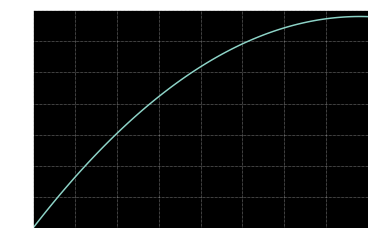

In [9]:
plt.plot(x,T)
plt.xlim(0,L)
plt.ylim(0,140)
plt.grid(linestyle = ":", linewidth =0.5)
plt.show()